In [1]:
import torch
import torchvision
import torchvision.transforms.functional as F
import numpy as np
import rasterio
import matplotlib.pyplot as plt

In [2]:
def display(img):
    plt.imshow(img[:3].permute(1, 2, 0))

In [3]:
path_file = '../data/raw/train/aerial/D004_2021/Z6_NU/img/IMG_000498.tif'

with rasterio.open(path_file) as f:
    img = f.read()
    img = torch.from_numpy(img)
    img = img.type(torch.uint8)

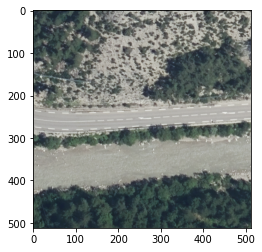

In [4]:
img = img / 255.0
display(img)

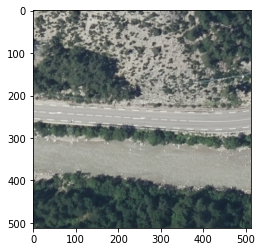

In [5]:
img = F.hflip(img) # use hflip again to recover the image
display(img)

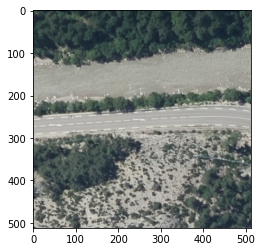

In [6]:
img = F.vflip(img) # use vflip again to recover the image
display(img)

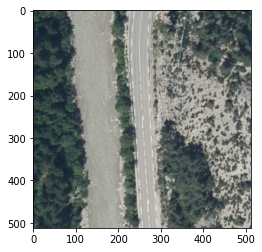

In [7]:
img = F.rotate(img, 90)
display(img)

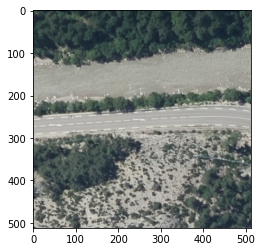

In [8]:
img = F.rotate(img, -90)
display(img)

In [9]:
distortion_scale = 0.5
height = img.shape[1]
width = img.shape[2]

half_height = height // 2
half_width = width // 2

topleft = [
    int(torch.randint(0, int(distortion_scale * half_width) + 1, size=(1,)).item()),
    int(torch.randint(0, int(distortion_scale * half_height) + 1, size=(1,)).item()),
]
topright = [
    int(torch.randint(width - int(distortion_scale * half_width) - 1, width, size=(1,)).item()),
    int(torch.randint(0, int(distortion_scale * half_height) + 1, size=(1,)).item()),
]
botright = [
    int(torch.randint(width - int(distortion_scale * half_width) - 1, width, size=(1,)).item()),
    int(torch.randint(height - int(distortion_scale * half_height) - 1, height, size=(1,)).item()),
]
botleft = [
    int(torch.randint(0, int(distortion_scale * half_width) + 1, size=(1,)).item()),
    int(torch.randint(height - int(distortion_scale * half_height) - 1, height, size=(1,)).item()),
]
startpoints = [[0, 0], [width, 0], [width, height], [0, height]]
endpoints = [topleft, topright, botright, botleft]

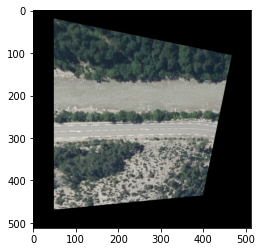

In [10]:
img = F.perspective(img, startpoints=startpoints, endpoints=endpoints)
display(img)

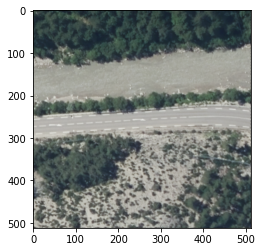

In [11]:
img = F.perspective(img, startpoints=endpoints, endpoints=startpoints)
display(img)